In [11]:
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
import pickle as pkl
from causalai.misc.misc import plot_graph
from causalai.data.data_generator import DataGenerator
from causalai.data.data_generator import GenerateRandomTimeseriesSEM

In [12]:
sem_time = GenerateRandomTimeseriesSEM(var_names=['a', 'b', 'c', 'd', 'e', 'f'],
                                       max_num_parents=4, seed=0, fn = lambda x:x)

sem_time

{'a': [(('e', -3), 0.1, <function __main__.<lambda>(x)>)],
 'b': [(('b', -3), 0.1, <function __main__.<lambda>(x)>),
  (('c', -2), 0.1, <function __main__.<lambda>(x)>),
  (('d', -1), 0.1, <function __main__.<lambda>(x)>)],
 'c': [(('f', -4), 0.1, <function __main__.<lambda>(x)>),
  (('c', -3), 0.1, <function __main__.<lambda>(x)>),
  (('d', -4), 0.1, <function __main__.<lambda>(x)>),
  (('e', -1), 0.1, <function __main__.<lambda>(x)>)],
 'd': [(('f', -1), 0.1, <function __main__.<lambda>(x)>)],
 'e': [(('e', -3), 0.1, <function __main__.<lambda>(x)>),
  (('b', -3), 0.1, <function __main__.<lambda>(x)>)],
 'f': [(('d', -2), 0.1, <function __main__.<lambda>(x)>),
  (('b', -1), 0.1, <function __main__.<lambda>(x)>),
  (('e', -4), 0.1, <function __main__.<lambda>(x)>),
  (('f', -2), 0.1, <function __main__.<lambda>(x)>)]}

In [13]:

T = 5000 # number of samples in case of tabular data, and length of time series in case of time series data

data_series, var_names_series, graph_gt_series = DataGenerator(sem_time, T=T,seed=0, discrete=False)

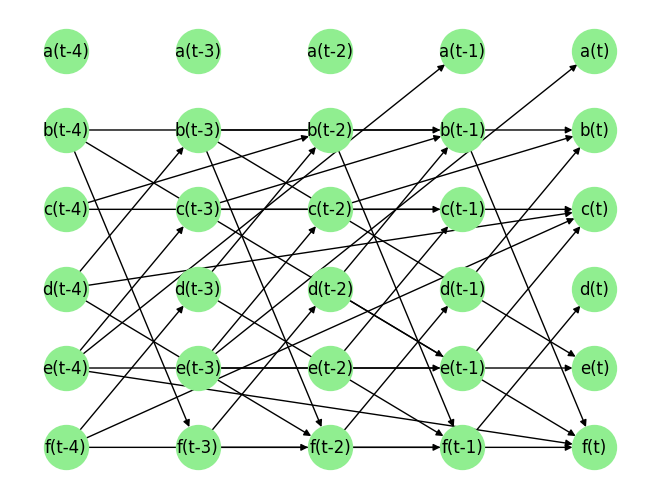

({'a': [('e', -3)],
  'b': [('b', -3), ('c', -2), ('d', -1)],
  'c': [('f', -4), ('c', -3), ('d', -4), ('e', -1)],
  'd': [('f', -1)],
  'e': [('e', -3), ('b', -3)],
  'f': [('d', -2), ('b', -1), ('e', -4), ('f', -2)]},
 ['a', 'b', 'c', 'd', 'e', 'f'])

In [14]:
plot_graph(graph_gt_series)
graph_gt_series, var_names_series

In [15]:
fn = lambda x:x # lambda function: lambda "arguments":"expression"
F1=F2=F3 = fn
k = 0.1
k1=k2=k3=k
noise_fn = np.random.randn
noise_fn_a= noise_fn_b= noise_fn_c = noise_fn

# ('a',-1), the -1 indicates that b is 
sem_time_series = {
        'a': [], 
        'b': [(('a', -1), k1, F1)], 
        'c': [(('a', -2), k2, F2), (('b', -2), k3, F3)],
        }

T = 5000 # number of samples in case of tabular data, and length of time series in case of time series data

data_time_series, var_names_time_series, graph_gt_time_series = DataGenerator(sem_time_series, T=T,seed=0, discrete=False)

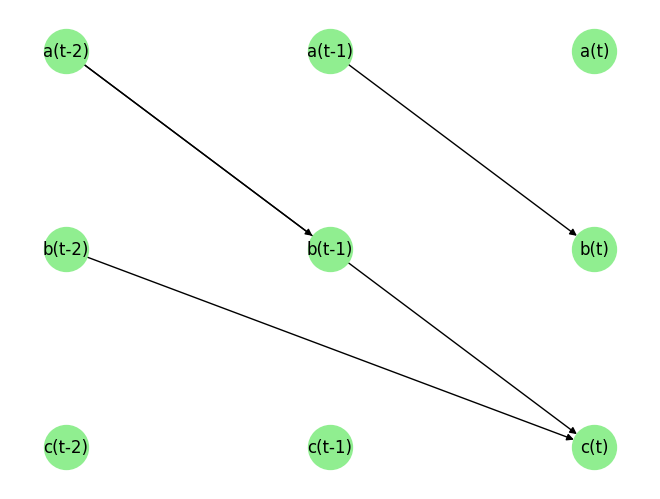

({'a': [], 'b': [('a', -1)], 'c': [('a', -2), ('b', -2)]}, ['a', 'b', 'c'])

In [16]:
plot_graph(graph_gt_time_series)
graph_gt_time_series, var_names_time_series

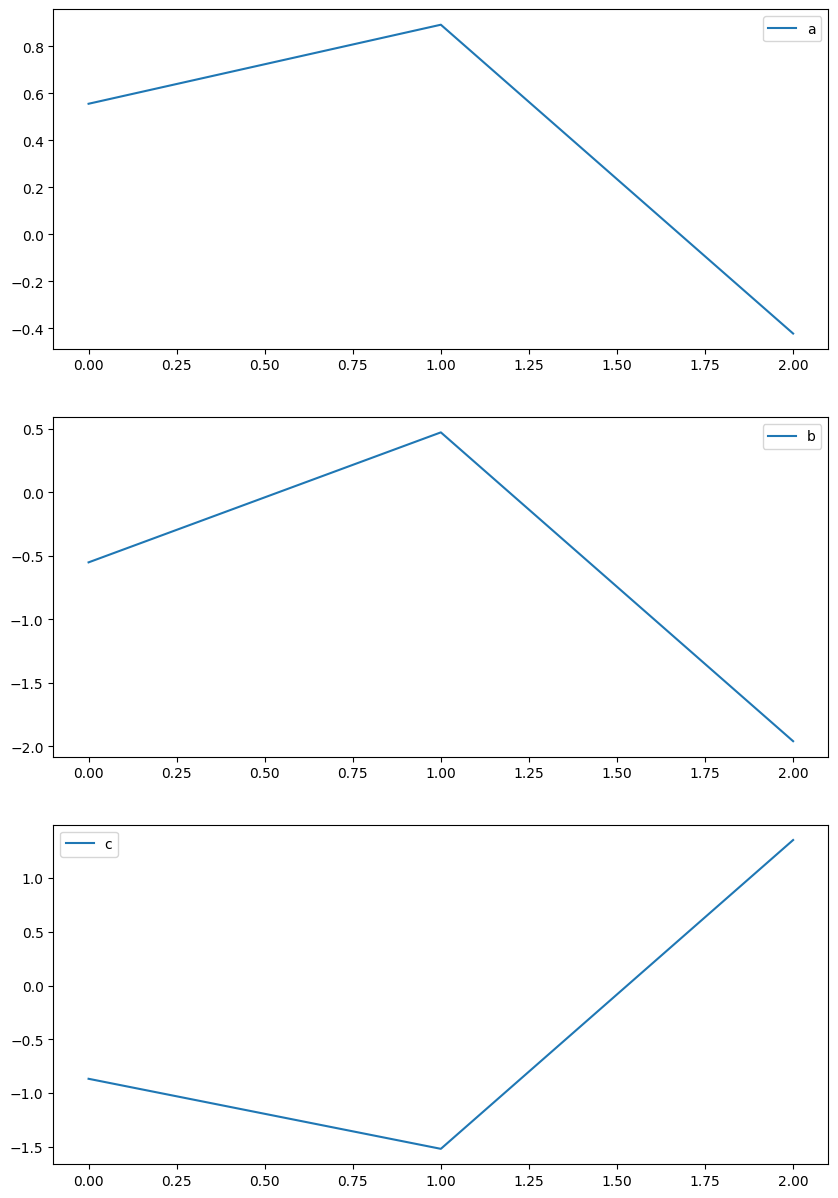

In [17]:
# Create a grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

labels = ["a","b","c"]

# Plot each column on a separate subplot
for i in range(data_time_series.shape[1]):
    axs[i].plot(data_time_series[:3,i], label = labels[i])
    axs[i].legend()
# Display the plot
plt.show()

In [18]:
data_time_series.shape

(5000, 3)